In [5]:
import numpy as np  

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
print(X.shape, y.shape)

(100, 1) (100, 1)


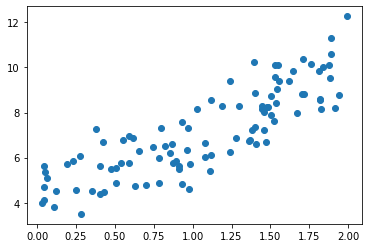

In [2]:
import matplotlib.pyplot as plt

plt.scatter(X, y)
plt.show()

In [6]:
# compute theta-hat using Normal Equation
# (X_T * X)-1 X_T * y
X_b = np.c_[np.ones((100, 1)), X]
X_b.shape

(100, 2)

In [8]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[3.85683834],
       [3.148287  ]])

In [10]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.85683834],
       [10.15341235]])

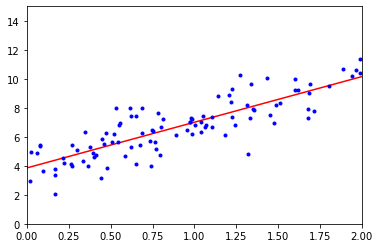

In [13]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.show()

In [17]:
# using sklearn
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X, y)
reg.intercept_, reg.coef_

(array([3.85683834]), array([[3.148287]]))

In [18]:
reg.predict(X_new)

array([[ 3.85683834],
       [10.15341235]])

In [19]:
# based on least squares
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.85683834],
       [3.148287  ]])

In [20]:
# psuedoinverse of X
np.linalg.pinv(X_b).dot(y)

array([[3.85683834],
       [3.148287  ]])

computational complexity of X_T * X is about O(n^2.4) to O(n^3)
SVD approached used by LinearRegression is O(n^2)
Both Normal Equation and SVD get slow when features > 100K
However they are linear in the size of the training set (m)  i.e. O(m)


In [23]:
# Gradient descent
# not all costs functions are convex
# MSE cost function for linear reg is though => guaranteed to approach global minimum
# ensure all features have a similar scale (StandardScaler) to ensure speedy convergence

eta = 0.1  # learning rate
n_iter = 1000
m = 100  # batch size
theta = np.random.randn(2, 1)
for i in range(n_iter):
    gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
    theta -= eta * gradients
theta

array([[3.85683834],
       [3.148287  ]])

In [27]:
# stochastic gradient descent / simulated annealing
# learning schedule determines learning rate

n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)
for epoch in range(n_epochs):
    for i in range(m):
        r = np.random.randint(m)
        xi = X_b[r: r + 1]
        yi = y[r: r + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta -= eta * gradients
        
theta

array([[3.86334965],
       [3.24637912]])

In [29]:
from sklearn.linear_model import SGDRegressor

reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1)
reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, max_iter=50, penalty=None)

In [30]:
print(reg.intercept_, reg.coef_)

[3.8877234] [3.19301345]


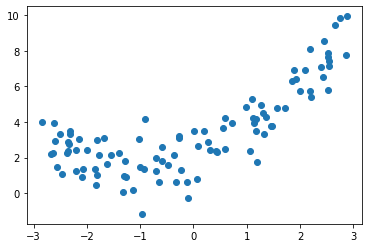

In [32]:
# Polynomial regression

m  = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
plt.scatter(X, y)

In [36]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X_poly[0])
print(X[0])

[-2.37236091  5.62809628]
[-2.37236091]


In [40]:
# X_poly contains original feature of X plus feature squared
# now fit linear regression to extended training data
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print(lin_reg.intercept_, lin_reg.coef_)
y_predict = lin_reg.predict(X_poly)

[2.06561416] [[1.01685579 0.48994519]]


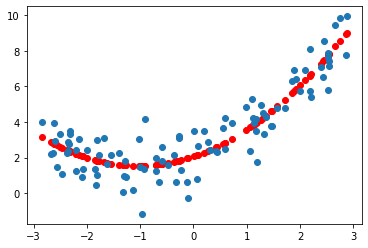

In [57]:
plt.scatter(X, y_predict, color='red')
plt.scatter(X, y)

warning PolynomialFeatures(degree=d) transforms an array containing n features into (n+d)!/n!d!

Ridge Regression / L2 regularization
objective = RSS + a * (sum of square of coefficients)

a = 0 => linear regression
a = inf => coeffs will be zero, result will be a flat line going thru mean
0 < a < inf => coeffs in (0, 1)

regularization term: a Sum(1, N, theta^2) added to cost function, only during training
J(theta) = MSE(theta)  + alpha/2 Sum(1, N, theta^2)
e.g. classifier trained using log loss is evaluted using F1
important to scale the data (StandardScaler) before performing ridge regression

In [59]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[5.05164892]])

In [60]:
sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([5.04480344])

Lasso Regression
Least absolute shrinkage and selection operator
uses l1 norm of weight vector instead of half the square of the l2 norm

J(theta) = MSE(theta) + alpha * sum(1, n, |theta_i|)

Tends to completely eliminate weights of the least important features (set to zero) (outputs a sparse model)

In [61]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([5.00434448])

Elastic Net  

mix of ridge and lasso controlled by r.
if you suspect only a few features matter, prefer Lasso or Elastic Net.
Lasso may behave erractically when features > train instances or when feature are correlated

In [63]:
from sklearn.linear_model import ElasticNet 
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([5.00480154])